In [1]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens

def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # stemming process
    output = stemmer.stem(text)
    return output


def stemming_sentence(text):
    output = ""
    for token in tokenisasi(text):
        output = output + stemming(token) + " "
    return output[:-1]

In [2]:
doc_dict_raw = {}
doc_dict_raw['doc1'] = "pengembangan sistem informasi penjadwalan"
doc_dict_raw['doc2'] = "pengembangan model analisis sentimen berita"
doc_dict_raw['doc3'] = "analisis sistem input output"
doc_dict_raw['doc4'] = "pengembangan sistem informasi akademik universitas"
doc_dict_raw['doc5'] = "pengembangan sistem cari berita ekonomi"
doc_dict_raw['doc6'] = "analisis sistem neraca nasional"
doc_dict_raw['doc7'] = "pengembangan sistem informasi layanan statistik"
doc_dict_raw['doc8'] = "pengembangan sistem pencarian skripsi di universitas"
doc_dict_raw['doc9'] = "analisis sentimen publik terhadap pemerintah"
doc_dict_raw['doc10'] = "pengembangan model klasifikasi sentimen berita"

doc_dict = {}
for doc_id,doc in doc_dict_raw.items():
    doc_dict[doc_id] = stemming_sentence(doc)
print(doc_dict)

{'doc1': 'kembang sistem informasi jadwal', 'doc2': 'kembang model analisis sentimen berita', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas', 'doc9': 'analisis sentimen publik hadap perintah', 'doc10': 'kembang model klasifikasi sentimen berita'}


In [3]:
vocab = []
inverted_index = {}
for doc_id,doc in doc_dict.items():
    for token in tokenisasi(doc):
        print(token)
        if token not in vocab:
            vocab.append(token)
            inverted_index[token] = []
        if token in inverted_index:
            if doc_id not in inverted_index[token]:
                inverted_index[token].append(doc_id)
print(vocab)
print(inverted_index)

kembang
sistem
informasi
jadwal
kembang
model
analisis
sentimen
berita
analisis
sistem
input
output
kembang
sistem
informasi
akademik
universitas
kembang
sistem
cari
berita
ekonomi
analisis
sistem
neraca
nasional
kembang
sistem
informasi
layan
statistik
kembang
sistem
cari
skripsi
di
universitas
analisis
sentimen
publik
hadap
perintah
kembang
model
klasifikasi
sentimen
berita
['kembang', 'sistem', 'informasi', 'jadwal', 'model', 'analisis', 'sentimen', 'berita', 'input', 'output', 'akademik', 'universitas', 'cari', 'ekonomi', 'neraca', 'nasional', 'layan', 'statistik', 'skripsi', 'di', 'publik', 'hadap', 'perintah', 'klasifikasi']
{'kembang': ['doc1', 'doc2', 'doc4', 'doc5', 'doc7', 'doc8', 'doc10'], 'sistem': ['doc1', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8'], 'informasi': ['doc1', 'doc4', 'doc7'], 'jadwal': ['doc1'], 'model': ['doc2', 'doc10'], 'analisis': ['doc2', 'doc3', 'doc6', 'doc9'], 'sentimen': ['doc2', 'doc9', 'doc10'], 'berita': ['doc2', 'doc5', 'doc10'], 'input': ['do

In [4]:
query = "sistem informasi statistik"
def termFrequency(vocab, query):
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query

tf_query = termFrequency(vocab, query)

In [5]:
# Term - Query Matrix
import numpy as np
def wordDocFre(vocab, doc_dict):
    df = {}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq = frq + 1
        df[word] = frq
    return df

def inverseDocFre(vocab,doc_fre,length):
    idf= {}
    for word in vocab:
        idf[word] = idf[word] = 1 + np.log((length + 1) / (doc_fre[word]+1))
    return idf

def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id] = {}
    for word in vocab:
        for doc_id,doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return tf_docs

idf = inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict))

TQ = np.zeros((len(vocab), 1)) #hanya 1 query
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word]*idf[word]
print(TQ)

[[0.        ]
 [1.31845373]
 [2.01160091]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [2.70474809]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [6]:
def tfidf(vocab,tf,idf_scr,doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id,doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
    return tf_idf_scr

tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict)), doc_dict)
# Term - Document Matrix
TD = np.zeros((len(vocab), len(doc_dict)))
for word in vocab:
    for doc_id,doc in tf_idf.items():
        ind1 = vocab.index(word)
        ind2 = list(tf_idf.keys()).index(doc_id)
        TD[ind1][ind2] = tf_idf[doc_id][word]
print(TD)

[[1.31845373 1.31845373 0.         1.31845373 1.31845373 0.
  1.31845373 1.31845373 0.         1.31845373]
 [1.31845373 0.         1.31845373 1.31845373 1.31845373 1.31845373
  1.31845373 1.31845373 0.         0.        ]
 [2.01160091 0.         0.         2.01160091 0.         0.
  2.01160091 0.         0.         0.        ]
 [2.70474809 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         2.29928298 0.         0.         0.         0.
  0.         0.         0.         2.29928298]
 [0.         1.78845736 1.78845736 0.         0.         1.78845736
  0.         0.         1.78845736 0.        ]
 [0.         2.01160091 0.         0.         0.         0.
  0.         0.         2.01160091 2.01160091]
 [0.         2.01160091 0.         0.         2.01160091 0.
  0.         0.         0.         2.01160091]
 [0.         0.         2.70474809 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.      

In [7]:
import math
def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))

    return dot_prod / (mag_1 * mag_2)

print(cosine_sim(TQ[:, 0], TD[:, 0])) #query & doc1
print(cosine_sim(TQ[:, 0], TD[:, 1])) #query & doc2
print(cosine_sim(TQ[:, 0], TD[:, 2])) #query & doc3
print(cosine_sim(TQ[:, 0], TD[:, 3])) #query & doc4
print(cosine_sim(TQ[:, 0], TD[:, 4])) #query & doc5
print(cosine_sim(TQ[:, 0], TD[:, 5])) #query & doc6
print(cosine_sim(TQ[:, 0], TD[:, 6])) #query & doc7
print(cosine_sim(TQ[:, 0], TD[:, 7])) #query & doc8
print(cosine_sim(TQ[:, 0], TD[:, 8])) #query & doc9
print(cosine_sim(TQ[:, 0], TD[:, 9])) #query & doc10

0.414904809442661
0.0
0.10856998991379904
0.35626622628022314
0.10705617011820337
0.10856998991379904
0.7689768599816609
0.08967792817935699
0.0
0.0


In [8]:
from collections import OrderedDict
def exact_top_k(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i + 1

    sorted_value = OrderedDict(sorted(relevance_scores.items(), key=lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    return top_k

top_3 = exact_top_k(doc_dict, TD, TQ[:, 0], 3)
print(top_3)

{'doc7': 0.7689768599816609, 'doc1': 0.414904809442661, 'doc4': 0.35626622628022314}


In [9]:
def index_elim_simple(query, doc_dict):
    remove_list =[]
    for doc_id,doc in doc_dict.items():
        n = 0
        for word in tokenisasi(query):
            if stemming(word) in doc:
                n = n+1
        if n==0:
            remove_list.append(doc_id)
    for key in remove_list:
        del doc_dict[key]
    return doc_dict

query = "sistem informasi statistik"
doc_dict = index_elim_simple(query, doc_dict)
print(doc_dict)

{'doc1': 'kembang sistem informasi jadwal', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas'}


In [10]:
def elim_query(query, idf_dict, idf_score):
    for term in tokenisasi(query):
        if idf_dict[stemming(term)]<idf_score:
            query = query.replace(term+" ", "")
            query = query.replace(term, "")
    return query

query = "sistem informasi statistik"
query = elim_query(query, idf, 1.5)
print(query)

informasi statistik


In [11]:
def create_championlist(inverted_index, tf_idf, r):
    champion_list = {}
    for term in inverted_index.keys():
        weight_scores = {}
        for doc_id,tf in tf_idf.items():
            if tf_idf[doc_id][term]!=0:
                weight_scores[doc_id] = tf_idf[doc_id][term]
        sorted_value = OrderedDict(sorted(weight_scores.items(), key=lambda x: x[1], reverse = True))
        top_r = {j: sorted_value[j] for j in list(sorted_value)[:r]}
        champion_list[term]=list(top_r.keys())
    return champion_list

r=2
create_championlist(inverted_index, tf_idf, r)

{'kembang': ['doc1', 'doc2'],
 'sistem': ['doc1', 'doc3'],
 'informasi': ['doc1', 'doc4'],
 'jadwal': ['doc1'],
 'model': ['doc2', 'doc10'],
 'analisis': ['doc2', 'doc3'],
 'sentimen': ['doc2', 'doc9'],
 'berita': ['doc2', 'doc5'],
 'input': ['doc3'],
 'output': ['doc3'],
 'akademik': ['doc4'],
 'universitas': ['doc4', 'doc8'],
 'cari': ['doc5', 'doc8'],
 'ekonomi': ['doc5'],
 'neraca': ['doc6'],
 'nasional': ['doc6'],
 'layan': ['doc7'],
 'statistik': ['doc7'],
 'skripsi': ['doc8'],
 'di': ['doc8'],
 'publik': ['doc9'],
 'hadap': ['doc9'],
 'perintah': ['doc9'],
 'klasifikasi': ['doc10']}

[[1.31845373 1.31845373 2.01160091 2.70474809 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.31845373 0.         0.         0.         2.29928298 1.78845736
  2.01160091 2.01160091 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.31845373 0.         0.         0.         1.78845736
  0.         0.         2.70474809 2.70474809 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.31845373 1.31845373 2.01160091 0.         0.         0.
  0.         0.         0.         0.         2.70474809 2.29928298
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0. 

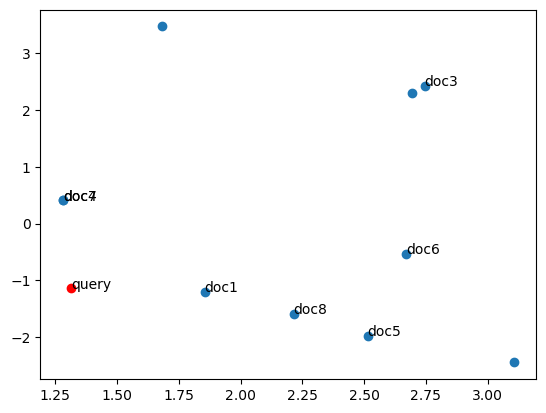

In [12]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

DT = TD.transpose()
print(DT)
model = TruncatedSVD(n_components=2, random_state=7).fit(DT)
DT_reduced = model.transform(DT)
QT_reduced = model.transform(TQ.transpose())
print(QT_reduced)
print(DT_reduced)
plt.scatter(DT_reduced[:, 0], DT_reduced[:, 1])
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color=["red"])
labels=list(doc_dict.keys())

for i, txt in enumerate(labels):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i, 1]))
    
plt.annotate("query", (QT_reduced[0, 0], QT_reduced[0, 1]))
plt.show()

In [13]:
top_5 = exact_top_k(doc_dict, TD, TQ[:, 0], 5)
print(top_5)

{'doc8': 0.7689768599816609, 'doc1': 0.414904809442661, 'doc5': 0.35626622628022314, 'doc4': 0.10856998991379904, 'doc7': 0.10856998991379904}


In [19]:
rel_vecs_id = ["doc1", "doc4", "doc5", "doc7", "doc8"]
nrel_vecs_id = ["doc2", "doc3", "doc6", "doc9", "doc10"]
doc_ids = ["doc1", "doc2", "doc3", "doc4", "doc5", "doc6", "doc7", "doc8", "doc9", "doc10"]


rel_vecs = []
for doc in rel_vecs_id:
    rel_vecs.append(DT[doc_ids.index(doc),:])

nrel_vecs = []
for doc in nrel_vecs_id:
    nrel_vecs.append(DT[doc_ids.index(doc),:])

In [23]:
query_vecs = TQ.transpose()
alpha = 1
beta = 0.75
gamma = 0.15
# Update query vectors with Rocchio algorithm
query_vecs = alpha * query_vecs + beta * np.mean(rel_vecs, axis=0) - gamma * np.mean(nrel_vecs, axis=0)
query_vecs[query_vecs<0] = 0 #negative value => 0

In [24]:
top_5 = exact_top_k(doc_dict, TD, query_vecs[0, :].transpose(), 5)
print(top_5)

{'doc8': 0.8139410370213072, 'doc1': 0.5657921418320059, 'doc5': 0.5552329765446049, 'doc6': 0.3144070835710513, 'doc4': 0.13037526674020886}


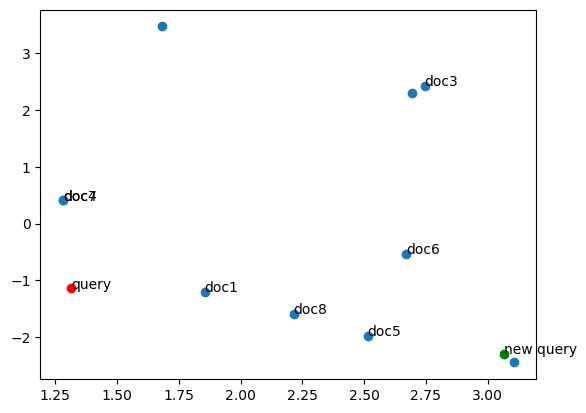

In [25]:
QT1_reduced = model.transform(query_vecs)
plt.scatter(DT_reduced[:, 0], DT_reduced[:, 1])
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color=["red"])
plt.scatter(QT1_reduced[:, 0], QT1_reduced[:, 1], color=["green"])

doc_ids=list(doc_dict.keys())
for i, txt in enumerate(doc_ids):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i, 1]))
    
plt.annotate("query", (QT_reduced[0, 0], QT_reduced[0, 1]))
plt.annotate("new query", (QT1_reduced[:, 0], QT1_reduced[:, 1]))
plt.show()

In [26]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


True

In [27]:
from itertools import chain
from nltk.corpus import wordnet

query = "information system"

expand_list = []
for term in query.split(" "):
    synonyms = wordnet.synsets(term)
    lemmas = set(chain.from_iterable([word.lemma_names() for word in
    synonyms]))
    print(lemmas)
    expand_list = expand_list + list(lemmas)
    
print(expand_list)

query_expand = query + " " + (" ".join(expand_list)).replace("_", " ")
print(query_expand)

{'entropy', 'data', 'selective_information', 'information', 'info'}
{'organization', 'system_of_rules', 'arrangement', 'system', 'scheme', 'organisation'}
['entropy', 'data', 'selective_information', 'information', 'info', 'organization', 'system_of_rules', 'arrangement', 'system', 'scheme', 'organisation']
information system entropy data selective information information info organization system of rules arrangement system scheme organisation
